In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sonnia.processing import Processing
from tqdm.notebook import tqdm


In [13]:
df = pd.read_csv('peptide-detail-ci_filtered_aligned_merged.csv')
df["Amino Acids 1"] = df["Amino Acids"].apply(lambda x: x.split(",")[0])
sub = df[["CDR3", "v_gene", "j_gene"]]
sub

KeyboardInterrupt: 

In [ ]:
sub.rename(columns={"CDR3": "beta", "v_gene": "v_beta", "j_gene": "j_beta"}, inplace=True)

C:\Users\yanis\AppData\Roaming\Python\Python38\site-packages\pandas\core\frame.py:4300: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [ ]:
sub["counts"] = 1
sub.to_csv("deeptcr_input.tsv", index=False, sep="\t")

<ipython-input-10-d5cc1c6305bf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub["counts"] = 1


In [18]:
small = sub.sample(10000).reset_index(drop=True)
small.to_csv("deeptcr_input_small.tsv", index=False, sep="\t")

In [20]:
from DeepTCR.DeepTCR import DeepTCR_U
import sys
sys.path.append('./DeepTCR-master/')
# Instantiate training object
DTCRU = DeepTCR_U('Tutorial')

#Load Data from directories
DTCRU.Get_Data(directory='./data_deeptcr_small',Load_Prev_Data=False,aggregate_by_aa=True,
               aa_column_beta=0,count_column=3,v_beta_column=1,j_beta_column=2)

#Train VAE
DTCRU.Train_VAE(stop_criterion=0.01,Load_Prev_Data=False)

Loading Data...
Embedding Sequences...
Data Loaded


C:\Users\yanis\AppData\Roaming\Python\Python38\site-packages\DeepTCR\functions\Layers.py:105: UserWarning: `tf.layers.conv2d` is deprecated and will be removed in a future version. Please Use `tf.keras.layers.Conv2D` instead.
  conv = tf.compat.v1.layers.conv2d(inputs, units[ii], (1, kernel), 1, padding='same',
C:\Users\yanis\AppData\Roaming\Python\Python38\site-packages\keras\legacy_tf_layers\convolutional.py:563: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  return layer.apply(inputs)
C:\Users\yanis\AppData\Roaming\Python\Python38\site-packages\DeepTCR\functions\Layers.py:107: UserWarning: `tf.layers.flatten` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Flatten` instead.
  conv_out = tf.compat.v1.layers.flatten(tf.reduce_max(input_tensor=conv, axis=2))
C:\Users\yanis\AppData\Roaming\Python\Python38\site-packages\keras\legacy_tf_layers\core.py:523: UserWarning: `laye

Epoch = 0, Iteration = 0 Total Loss: 8.42553: Recon Loss: 8.34428: Latent Loss: 0.08125: Sparsity Loss: 0.00000: Recon Accuracy: 0.06130
Epoch = 1, Iteration = 0 Total Loss: 7.96055: Recon Loss: 7.87918: Latent Loss: 0.08137: Sparsity Loss: 0.00000: Recon Accuracy: 0.09431
Epoch = 2, Iteration = 0 Total Loss: 7.64857: Recon Loss: 7.56286: Latent Loss: 0.08571: Sparsity Loss: 0.00000: Recon Accuracy: 0.11870
Epoch = 3, Iteration = 0 Total Loss: 7.39367: Recon Loss: 7.29092: Latent Loss: 0.10275: Sparsity Loss: 0.00000: Recon Accuracy: 0.14995
Epoch = 4, Iteration = 0 Total Loss: 7.24945: Recon Loss: 7.10647: Latent Loss: 0.14298: Sparsity Loss: 0.00000: Recon Accuracy: 0.19483
Epoch = 5, Iteration = 0 Total Loss: 7.09427: Recon Loss: 6.96375: Latent Loss: 0.13052: Sparsity Loss: 0.00000: Recon Accuracy: 0.22815
Epoch = 6, Iteration = 0 Total Loss: 6.96630: Recon Loss: 6.86213: Latent Loss: 0.10417: Sparsity Loss: 0.00000: Recon Accuracy: 0.24466
Epoch = 7, Iteration = 0 Total Loss: 6.86

In [21]:
%%capture
DTCRU.Train_VAE(Load_Prev_Data=False,sparsity_alpha=1.0,var_explained = 0.99)

INFO:tensorflow:Tutorial\models\model_0\model.ckpt is not in all_model_checkpoint_paths. Manually adding it.


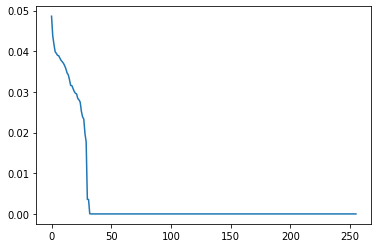

In [22]:
plt.plot(DTCRU.explained_variance_ratio_)

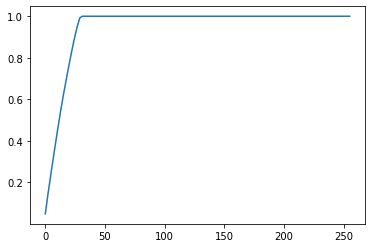

In [23]:
plt.plot(np.cumsum(DTCRU.explained_variance_ratio_))